C:\Users\hanseo\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\hanseo\Anaconda3\lib\site-packages\ipykernel\__main__.py:30: RuntimeWarning: invalid value encountered in multiply


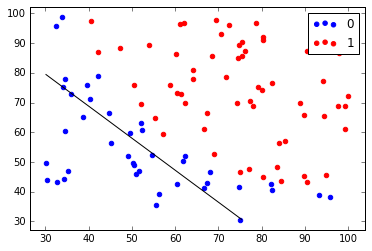

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# 데이터를 불러옵니다.
data = pd.read_csv('C:/Users/hanseo/Desktop/data.txt', header=None)
data = np.array(data)
X = data[:, [0,1]]
y = data[:, 2]


# Logistic 회귀 모델을 구현합니다.
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=300000, fit_intercept=True):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
    
    def add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    # sigmoid 함수를 작성하세요.
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    # loss 함수를 작성하세요.
    def loss(self, h, y):
        return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
    
    # 모델을 학습하는 fit 함수를 작성하세요.
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X,self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T,(h-y))/y.size
            self.theta = self.theta - self.lr*gradient
            
            z = np.dot(X,self.theta)
            h = self.sigmoid(z)
        loss = self.loss(h,y)
        
        return z, h, loss
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.add_intercept(X)
    
        return self.sigmoid(np.dot(X, self.theta))
    
    # predict_prob 함수를 이용해 predict 함수를 완성하세요.
    def predict(self, X):
        return self.predict_prob(X).round()
        
    
# 모델을 학습합니다.
model = LogisticRegression()
model.fit(X, y)


# 결과를 출력합니다.
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))

grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

plt.show()

(1797, 64) (1797,)


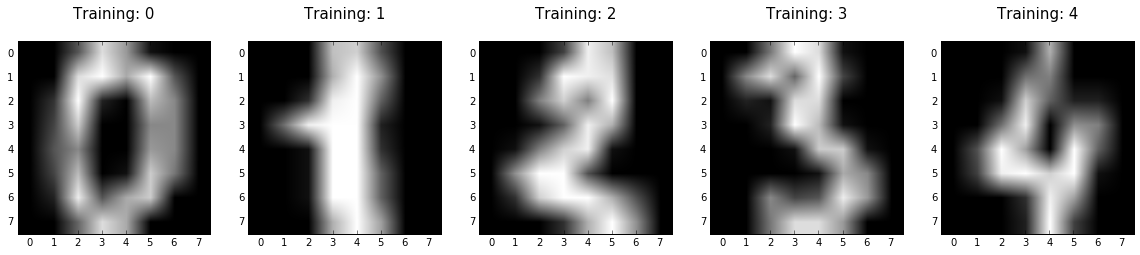

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# 숫자 인식을 위한 데이터를 불러옵니다. 
from sklearn.datasets import load_digits
# 학습용, 테스트용으로 분류하기 위한 함수를 불러옵니다.
from sklearn.model_selection import train_test_split
# Logistic 회귀분석을 위한 클래스를 불러옵니다. 
from sklearn.linear_model import LogisticRegression

# sklearn의 내장 숫자 데이터를 load_digits 함수를 이용해 저장합니다.
digits = load_digits()
# 아래 주석을 해제하고 데이터를 확인하세요.
print(digits.data.shape, digits.target.shape)

# 데이터를 이미지로 출력합니다.
plt.figure(figsize=(20,5))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index+1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: {}\n".format(label), fontsize=15)
    
plt.show()

(1347, 64) (1347,)
(450, 64) (450,)
Predicted: [2 8 2 6 6 7 1 9 8 5]
Actual: [2 8 2 6 6 7 1 9 8 5]
Score: 0.953333333333


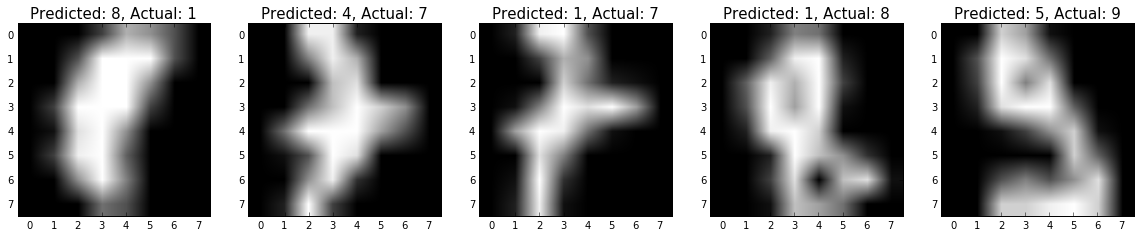

In [7]:
# 데이터를 학습용, 테스트용으로 분리합니다.
x_train, x_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.25,random_state=0)
                                   
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

# Logistic 회귀분석 모델을 학습합니다.
model = LogisticRegression()
model.fit(x_train, y_train)

# 모델의 예측값과 정확도를 저장합니다.
predictions = model.predict(x_test)
score = model.score(x_test,y_test)

# 예측값, 실제값, 정확도를 출력합니다.
print("Predicted:", predictions[:10])
print("Actual:", y_test[:10])
print("Score:", score)


# 잘못 분류된 데이터를 이미지로 출력합니다.
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,5))
for plotIndex, wrong in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[wrong], (8,8)), cmap=plt.cm.gray)
    plt.title("Predicted: {}, Actual: {}".format(predictions[wrong], y_test[wrong]), fontsize = 15)
    
plt.show()